<a href="https://colab.research.google.com/github/annalocvf/Economia-Computacional-2025-2/blob/main/economia_computacional_2025_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download do Arquivo de Dados

A célula abaixo utiliza o comando `wget` para baixar um arquivo Excel (`.xlsx`) da internet.

*   `!wget`: É um comando de linha de comando usado para recuperar conteúdo de servidores web. O `!` no início indica que este é um comando shell executado diretamente no ambiente do Colab.
*   `-O "Atlas-2025.xlsx"`: O parâmetro `-O` (letra 'O' maiúscula) especifica o nome de arquivo local sob o qual o documento recuperado será salvo. Neste caso, o arquivo será salvo como `Atlas-2025.xlsx`.
*   `"https://www.epe.gov.br/_layouts/download.aspx?sourceURL=%2Fsites-pt%2Fpublicacoes-dados-abertos%2Fpublicacoes%2FPublicacoesArquivos%2Fpublicacao-940%2FAtlas%25202025%2520-%2520Planilha%2520de%2520dados.xlsx"`: Esta é a URL completa do arquivo que será baixado.

Este comando garante que o arquivo de dados `Atlas 2025 - Planilha de dados.xlsx` seja baixado para o ambiente de execução do Colab com um nome de arquivo específico.

In [1]:
!wget -O "Atlas-2025.xlsx" "https://www.epe.gov.br/_layouts/download.aspx?sourceURL=%2Fsites-pt%2Fpublicacoes-dados-abertos%2Fpublicacoes%2FPublicacoesArquivos%2Fpublicacao-940%2FAtlas%25202025%2520-%2520Planilha%2520de%2520dados.xlsx"

--2026-01-14 21:47:11--  https://www.epe.gov.br/_layouts/download.aspx?sourceURL=%2Fsites-pt%2Fpublicacoes-dados-abertos%2Fpublicacoes%2FPublicacoesArquivos%2Fpublicacao-940%2FAtlas%25202025%2520-%2520Planilha%2520de%2520dados.xlsx
Resolving www.epe.gov.br (www.epe.gov.br)... 177.38.96.136, 177.47.116.42
Connecting to www.epe.gov.br (www.epe.gov.br)|177.38.96.136|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /_layouts/15/download.aspx?sourceURL=%2Fsites-pt%2Fpublicacoes-dados-abertos%2Fpublicacoes%2FPublicacoesArquivos%2Fpublicacao-940%2FAtlas%25202025%2520-%2520Planilha%2520de%2520dados.xlsx [following]
--2026-01-14 21:47:12--  https://www.epe.gov.br/_layouts/15/download.aspx?sourceURL=%2Fsites-pt%2Fpublicacoes-dados-abertos%2Fpublicacoes%2FPublicacoesArquivos%2Fpublicacao-940%2FAtlas%25202025%2520-%2520Planilha%2520de%2520dados.xlsx
Reusing existing connection to www.epe.gov.br:443.
HTTP request sent, awaiting response... 200 OK
Length: 3664014 (3.5M)

## Carregamento de Dados usando Pandas

A célula abaixo utiliza a biblioteca `pandas` para carregar um conjunto específico de dados do arquivo Excel `Atlas-2025.xlsx`. O objetivo é extrair apenas uma parte da aba 'Fig. 14', que corresponde ao intervalo de células A21 a Y25.

Detalhes dos parâmetros utilizados na função `pd.read_excel`:

*   `'Atlas-2025.xlsx'`: Indica o nome do arquivo Excel a ser lido.
*   `sheet_name='Fig.14'`: Especifica que os dados devem ser carregados da aba chamada 'Fig.14'.
*   `skiprows=20`: Instrução para pular as primeiras 20 linhas do início da aba. Isso faz com que a leitura comece a partir da linha 21 do Excel, que é onde o cabeçalho dos dados que nos interessam está localizado.
*   `header=0`: Após pular as 20 linhas, esta opção indica que a primeira linha lida (a linha 21 original do Excel) deve ser tratada como o cabeçalho (nomes das colunas) do DataFrame.
*   `nrows=5`: Limita a leitura a apenas 5 linhas de dados após o cabeçalho. Assim, as linhas 22 a 26 do Excel (total de 5 linhas de dados) serão incluídas no DataFrame.
*   `usecols='A:Y'`: Especifica que apenas as colunas de 'A' a 'Y' devem ser consideradas. Quaisquer outras colunas fora desse intervalo serão ignoradas.

O resultado é um DataFrame (`df_fig14_parte`) contendo apenas os dados relevantes da tabela na 'Fig. 14', com os cabeçalhos corretos e sem informações desnecessárias das linhas iniciais da aba.

In [2]:
import pandas as pd

# Carrega os dados da aba 'Fig. 14' no intervalo especificado
# skiprows=20 pula as primeiras 20 linhas (chegando à linha 21)
# header=0 indica que a primeira linha após pular (linha 21) é o cabeçalho
# nrows=5 lê 5 linhas de dados (da linha 21 à 25, inclusive)
# usecols='A:Y' seleciona as colunas de A até Y
df_fig14_parte = pd.read_excel(
    'Atlas-2025.xlsx',
    sheet_name='Fig.14',
    skiprows=20,
    header=0,
    nrows=5,
    usecols='A:Y'
)

print("Dados carregados da aba 'Fig. 14' (A21:Y25):")
display(df_fig14_parte.head())

Dados carregados da aba 'Fig. 14' (A21:Y25):


,FONTES,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Eletricidade,0.313746,0.301040,0.311672,0.314522,0.325556,0.331498,0.347851,0.357998,0.370197,...,0.443540,0.450083,0.444670,0.437929,0.449751,0.452345,0.454816,0.461980,0.484094,0.507652
1,GLP,0.313056,0.294071,0.271763,0.271269,0.259943,0.256487,0.262415,0.263166,0.261556,...,0.257140,0.258855,0.254068,0.241330,0.237579,0.238174,0.228222,0.221216,0.210738,0.206729
2,Lenha,0.339117,0.369416,0.379064,0.375773,0.374716,0.371765,0.347682,0.335585,0.322034,...,0.248978,0.238802,0.249454,0.267801,0.258823,0.254712,0.260375,0.259325,0.250016,0.229348
3,Outros,0.034080,0.035473,0.037502,0.038436,0.039784,0.040250,0.042053,0.043251,0.046213,...,0.050342,0.052260,0.051808,0.052940,0.053847,0.054769,0.056587,0.057478,0.055152,0.056271


## Criação de Array NumPy e Cálculos Estatísticos por Linha

A célula abaixo realiza as seguintes operações:

1.  **Seleção de Dados Numéricos**: Utiliza `df_fig14_parte.iloc[:, 1:]` para selecionar todas as linhas e todas as colunas a partir do índice 1 (a segunda coluna) até a última coluna. Esta seleção é feita assumindo que as colunas numéricas de interesse (os anos) começam na segunda coluna e que a primeira coluna (`FONTES`) é categórica. O uso de `to_numpy()` converte esta seleção de dados em um array NumPy chamado `numeric_data_array`.

    *   `df_fig14_parte.iloc[:, 1:]`: O `iloc` permite a indexação por posição inteira. `[:, 1:]` significa 'todas as linhas' e 'da coluna de índice 1 (a segunda) até o final'.

2.  **Exibição do Array e Formato**: O `numeric_data_array` e seu formato (`shape`) são exibidos para confirmar a estrutura dos dados numéricos.

3.  **Cálculo da Média por Linha**: `np.mean(numeric_data_array, axis=1)` calcula a média de todos os elementos em cada linha do `numeric_data_array`. O parâmetro `axis=1` indica que a operação deve ser aplicada ao longo das linhas (ou seja, a média de cada fonte ao longo dos anos). A média (ou valor esperado) de um conjunto de dados é calculada somando-se todos os valores e dividindo-se pela quantidade de valores. A fórmula para calcular a média, $\mu$, pode ser expressa da seguinte forma:

$$\mu = \frac{\sum_{i=1}^{n} x_i}{n}$$

4.  **Cálculo do Desvio Padrão por Linha**: `np.std(numeric_data_array, axis=1)` calcula o desvio padrão de todos os elementos em cada linha do `numeric_data_array`. O `axis=1` novamente garante que o cálculo é feito por linha. O desvio padrão mede a dispersão de um conjunto de dados em relação à sua média. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma ampla gama de valores, dado por:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}$$

Esses cálculos fornecem uma visão rápida das tendências centrais e da dispersão dos valores de cada fonte de energia ao longo dos anos.




In [3]:
import numpy as np

# Seleciona apenas as colunas numéricas (os anos) do df_fig14_parte
# df_fig14_parte.iloc[:, 1:-1] seleciona todas as linhas e colunas do índice 1 até a penúltima coluna (-1 é 'Media_Linha'),
# que são as colunas de ano numéricas.
numeric_data_array = df_fig14_parte.iloc[:, 1:].to_numpy()

print("Array NumPy criado a partir das colunas numéricas de df_fig14_parte:")
display(numeric_data_array)
print("Formato (shape) do array:")
display(numeric_data_array.shape)

mean_per_row = np.mean(numeric_data_array, axis=1)
display(mean_per_row)

std_per_row = np.std(numeric_data_array, axis=1)
display(std_per_row)

Array NumPy criado a partir das colunas numéricas de df_fig14_parte:


array([[0.31374602, 0.30103982, 0.31167201, 0.31452167, 0.3255559 ,
        0.33149787, 0.34785062, 0.35799798, 0.3701967 , 0.38668733,
        0.40833914, 0.41958161, 0.44521615, 0.45049732, 0.44354007,
        0.45008343, 0.44466982, 0.43792905, 0.44975081, 0.45234515,
        0.4548162 , 0.46198034, 0.48409422, 0.50765213],
       [0.31305636, 0.2940709 , 0.27176272, 0.27126936, 0.25994346,
        0.25648673, 0.26241471, 0.26316607, 0.26155559, 0.26410752,
        0.26987766, 0.26513296, 0.27030015, 0.25874943, 0.2571404 ,
        0.25885477, 0.25406788, 0.24133005, 0.23757947, 0.23817426,
        0.22822173, 0.22121631, 0.21073753, 0.20672901],
       [0.33911713, 0.36941597, 0.37906359, 0.37577342, 0.3747164 ,
        0.37176504, 0.34768174, 0.33558519, 0.32203433, 0.30514058,
        0.275847  , 0.26841589, 0.23798264, 0.2418624 , 0.248978  ,
        0.23880197, 0.24945409, 0.26780051, 0.25882299, 0.25471174,
        0.26037484, 0.25932492, 0.25001648, 0.22934822],
       [0.034

Formato (shape) do array:


(4, 24)

array([0.40296922, 0.25566438, 0.29425146, 0.04711494])

array([0.0617526 , 0.02346984, 0.05225788, 0.006988  ])

## Geração do Gráfico de Barras com Matplotlib

A célula abaixo utiliza a biblioteca `matplotlib.pyplot` para criar um gráfico de barras que visualiza a média de participação das fontes de energia, complementado com barras de erro que representam o desvio padrão e porcentagens no topo de cada barra.

Detalhes da implementação:

1.  **Importação de Bibliotecas**: Importa `matplotlib.pyplot` para plotagem e `numpy` para operações numéricas, caso necessário.

2.  **Verificação de Variáveis**: Um `if` verifica se as variáveis `mean_per_row`, `std_per_row` e `df_fig14_parte` existem no ambiente. Isso garante que os dados necessários para o gráfico foram previamente calculados e carregados.

3.  **Obtenção de Rótulos**: `labels = df_fig14_parte['FONTES'].tolist()` extrai os nomes das fontes de energia da coluna 'FONTES' do DataFrame `df_fig14_parte` para serem usados como rótulos no eixo X.

4.  **Criação do Gráfico de Barras**:
    *   `plt.figure(figsize=(12, 7))`: Define o tamanho da figura do gráfico, tornando-a maior para melhor visualização dos rótulos.
    *   `bars = plt.bar(labels, mean_per_row, yerr=std_per_row, capsize=5, color='skyblue')`: Cria as barras do gráfico.
        *   `labels`: Rótulos para cada barra (as fontes de energia).
        *   `mean_per_row`: Altura de cada barra (a média de participação calculada).
        *   `yerr=std_per_row`: Adiciona barras de erro verticais, com o comprimento determinado pelo desvio padrão de cada fonte.
        *   `capsize=5`: Define o tamanho das "tampas" nas extremidades das barras de erro.
        *   `color='skyblue'`: Define a cor das barras.

5.  **Adição de Porcentagens nas Barras**:
    *   `offset = 0.11`: Uma variável `offset` é definida para ajustar a posição horizontal do texto, movendo-o ligeiramente para a direita para evitar sobreposição com as barras de erro.
    *   Um loop `for bar in bars:` itera sobre cada barra criada. Para cada barra:
        *   `yval = bar.get_height()`: Obtém a altura da barra (o valor médio).
        *   `plt.text(...)`: Adiciona um texto no topo da barra. O texto é formatado como porcentagem (`f'{yval:.1%}'`), centralizado horizontalmente (`ha='center'`) e alinhado à base (`va='bottom'`), com um pequeno deslocamento vertical (`yval + 0.01`) e o ajuste horizontal (`offset`) para melhor posicionamento.

6.  **Configurações Adicionais do Gráfico**:
    *   `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.title(...)`: Definem os títulos dos eixos X e Y, e o título principal do gráfico.
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X em 45 graus para facilitar a leitura, especialmente com nomes mais longos.
    *   `plt.ylim(...)`: Ajusta o limite superior do eixo Y para garantir que as porcentagens e as barras de erro sejam totalmente visíveis.
    *   `plt.tight_layout()`: Ajusta automaticamente os parâmetros da subtrama para que o gráfico caiba na área da figura sem sobreposição.
    *   `plt.show()`: Exibe o gráfico.

Este código gera um gráfico de barras informativo, mostrando as médias de participação de cada fonte de energia, sua variabilidade e os valores exatos em porcentagem.

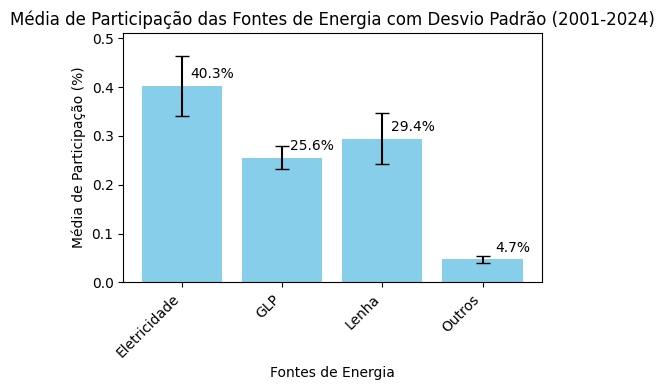

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Certifica-se de que mean_per_row, std_per_row e df_fig14_parte existem
if 'mean_per_row' in locals() and 'std_per_row' in locals() and 'df_fig14_parte' in locals():
    # Obtém os rótulos das fontes de energia
    labels = df_fig14_parte['FONTES'].tolist()

    # Cria o gráfico de barras com barras de erro
    plt.figure(figsize=(5, 4)) # Aumenta um pouco o tamanho para acomodar os rótulos
    bars = plt.bar(labels, mean_per_row, yerr=std_per_row, capsize=5, color='skyblue')

    # Adiciona as porcentagens no topo de cada barra
    # Ajusta o posicionamento horizontal (get_x() + get_width()/2 + offset) para mover o texto
    offset = 0.3 # Ajuste este valor para mover para a direita (positivo) ou esquerda (negativo)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2 + offset, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom') # Formata como porcentagem

    # Adiciona título e rótulos aos eixos
    plt.xlabel('Fontes de Energia')
    plt.ylabel('Média de Participação (%)') # Altera o rótulo do eixo Y
    plt.title('Média de Participação das Fontes de Energia com Desvio Padrão (2001-2024)')
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização
    plt.ylim(0, max(mean_per_row + std_per_row) * 1.1) # Ajusta o limite superior do eixo Y
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()
else:
    print("Variáveis 'mean_per_row', 'std_per_row' ou 'df_fig14_parte' não encontradas. Por favor, execute as células anteriores que as criam.")